# Stats practice

## Testing for normality

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
from random import normalvariate, uniform, weibullvariate

In [3]:
# Make several sets of data; one randomly sampled 
# from a normal distribution and others that aren't.

n = 100
d_norm = [normalvariate(0,1) for x in range(n)]
d_unif = [uniform(0,1) for x in range(n)]
d_weib = [weibullvariate(1,1.5) for x in range(n)]

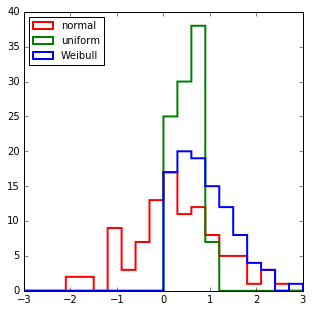

In [4]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
bins = 20
xmin,xmax = -3,3
ax.hist(d_norm,histtype='step',bins=bins,range=(xmin,xmax),lw=2,
        color='red',label='normal')
ax.hist(d_unif,histtype='step',bins=bins,range=(xmin,xmax),lw=2,
        color='green',label='uniform')
ax.hist(d_weib,histtype='step',bins=bins,range=(xmin,xmax),lw=2,
        color='blue',label='Weibull')
ax.legend(loc='upper left',fontsize=10);

### Make probability plots

In [5]:
from scipy.stats import norm,probplot

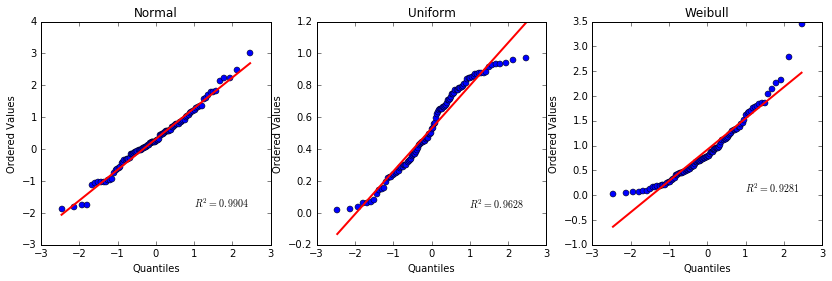

In [6]:
dists = (d_norm,d_unif,d_weib)
labels = ('Normal','Uniform','Weibull')
fig,axarr = plt.subplots(1,3,figsize=(14,4))
for d,ax,l in zip(dists,axarr.ravel(),labels):
    probplot(d, dist=norm, plot=ax)
    ax.set_title(l)

Interesting. Normal distribution follows the quantiles well and has the highest $R^2$ value, but both the uniform and Weibull distributions aren't very different. Need to temper what I think of as a convincing $R^2$ value. 

### Run Anderson-Darling test

In [7]:
from scipy.stats import anderson

Note that critical and significance values are always the same in the Anderson-Darling test regardless of the input. The A^2 value must be compared to them; if the test statistic is greater than the critical value at a given significance, then the null hypothesis is rejected with that level of confidence.

In [8]:
for d,l in zip(dists,labels):
    a2, crit, sig = anderson(d,dist='norm')
    if a2 > crit[2]:
        print "Anderson-Darling value for {:7} is A^2={:.3f}; reject H0 at 95%.".format(l,a2)
    else:
        print "Anderson-Darling value for {:7} is A^2={:.3f}; cannot reject H0 at 95%.".format(l,a2)

Anderson-Darling value for Normal  is A^2=0.304; cannot reject H0 at 95%.
Anderson-Darling value for Uniform is A^2=1.308; reject H0 at 95%.
Anderson-Darling value for Weibull is A^2=1.449; reject H0 at 95%.


## Practice problems

### Gender ratio

In a certain country, girls are highly prized. Every couple having children wants exactly one girl. When they begin having children, if they have a girl, they stop. If they have a boy, they keep having children until they get a girl. 

What is the expected ratio of boys to girls in the country?

In [3]:
from numpy.random import binomial

In [7]:
# Monte Carlo solution

N = 100000
p_girl = 0.5
p_boy = 1 - p_girl

n_girl = 0
n_boy = 0

for i in range(N):
    has_girl = False
    
    while not has_girl:
        child = binomial(1,p_girl)
        if child:
            n_girl += 1
            has_girl = True
        else:
            n_boy += 1

n_child = n_girl + n_boy
print "Gender ratio is {:.1f}%/{:.1f}% boy/girl.".format(n_boy * 100./n_child, n_girl * 100./n_child)

Gender ratio is 50.2%/49.8% boy/girl.
